In [11]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
STRATEGY = ["desktop", "mobile"][0]
CATEGORY = ["accessibility", "performance", "best-practices"][0]

In [6]:
JSON_FILE_NAME = f"data/{STRATEGY}_{CATEGORY}.json"
print(JSON_FILE_NAME)

data/desktop_accessibility.json


In [5]:
json_obj = None
with open(JSON_FILE_NAME, "r") as in_file:
    json_obj = json.load(in_file)
    # print(json.dumps(j_file, indent=4, ensure_ascii=False))

In [9]:
scores = []
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["accessibility"]["score"]
        scores.append(acc_score)
        print(acc_score)
    except:
        print(k)

0.69
0.76
0.78
0.9
0.75
0.74
0.8
0.73
0.82
0.8
Gaziantep Büyükşehir Belediyesi
0.86
0.69
0.74
0.81
Konya Büyükşehir Belediyesi
0.82
0.61
0.78
0.77
0.41
0.74
0.72
0.57
0.63
0.77
0.74
0.82
0.8
0.55


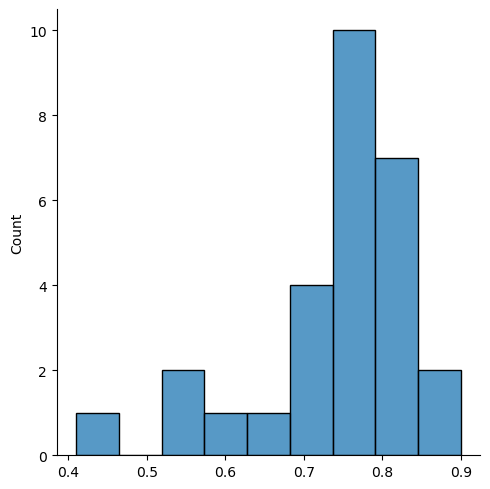

In [19]:
sns.displot(scores, kind="hist")